### PERFORMING DATA PARTITION ON A SAMPLE DATASET

In [31]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split

In [32]:
data = load_wine()

In [33]:
X = pd.DataFrame(data.data)
Y = pd.DataFrame(data.target)
print(X.shape,Y.shape)

(178, 13) (178, 1)


In [34]:
X,X_test,Y,Y_test = train_test_split(X,Y, test_size=0.3)

In [35]:
print(X.shape,X_test.shape,Y.shape,Y_test.shape)

(124, 13) (54, 13) (124, 1) (54, 1)


In [36]:
##we want our validation set to be a proportion of our training set
dev_size = 43/99
print(dev_size)

0.43434343434343436


In [37]:
X_train,X_dev,Y_train,Y_dev=train_test_split(X,Y, test_size=dev_size)
print(X_train.shape,Y_train.shape,X_dev.shape,Y_dev.shape,X_test.shape,Y_test.shape)

(70, 13) (70, 1) (54, 13) (54, 1) (54, 13) (54, 1)


### CROSS VALIDATION

In [38]:
## employs the method of resampling of samples in the dataset for k subgroups and k number of times
from sklearn.model_selection import KFold

In [39]:
##performing a 3 split cross validation
X,X_test,Y,Y_test = train_test_split(X,Y, test_size=0.1)
print(X.shape,X_test.shape,Y.shape,Y_test.shape)

(111, 13) (13, 13) (111, 1) (13, 1)


In [40]:
##kfold
kf = KFold(n_splits=10)
splits = kf.split(X)

In [41]:
for i, (train_idx, test_idx) in enumerate(splits):
    print(f"Fold {i+1}")
    print("Train indexes:", train_idx)
    print("Test indexes:", test_idx)
    print('====================================')

Fold 1
Train indexes: [ 12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29
  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110]
Test indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Fold 2
Train indexes: [  0   1   2   3   4   5   6   7   8   9  10  11  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110]
Test indexes: [12 13 14 15 16 17 18 19 20 21 22]
Fold 3
Train indexes: [  0   1   2   3   4   

In [42]:
##IT IS IMPORTANT TO NOTE THAT THE X AND Y ARE THE TRAIN SETS
for train_index,test_index in splits:
    X_train,X_dev=X.iloc[train_index,:],X.iloc[test_index,:]
    Y_train,Y_dev=Y.iloc[train_index,:],Y.iloc[test_index,:]

In [43]:
print(X_train.shape,X_dev.shape,Y_train.shape,Y_dev.shape,X_test.shape,Y_test.shape)

(70, 13) (54, 13) (70, 1) (54, 1) (13, 13) (13, 1)


### Data Partitioning on a Handwritten Digit Dataset

###### Your company specializes in recognizing handwritten characters. It wants to improve the recognition of digits, which is why they have gathered a dataset of 1,797 handwritten digits from 0 to 9. The images have already been converted into their numeric representation, and so they have provided you with the dataset to split it into training/validation/testing sets

In [44]:
from sklearn.datasets import load_digits

In [45]:
digits = load_digits()

In [46]:
### using the conventional approach for splitting data 60/20/20
X = pd.DataFrame(digits.data)
X1 = X.copy(deep=True)
Y = pd.DataFrame(digits.target)
Y1 = Y.copy(deep=True)
print(X.shape,Y.shape)

(1797, 64) (1797, 1)


In [47]:
DATA = pd.concat([X,Y],axis=1)

In [48]:
DATA.head(20)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,0
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [49]:
###conventional split approach
X,X_test,Y,Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)
print('train shape:',X.shape,'train shape(target):',Y.shape,'test shape:',X_test.shape,'test shape(target):',Y_test.shape)

train shape: (1437, 64) train shape(target): (1437, 1) test shape: (360, 64) test shape(target): (360, 1)


In [50]:
### creating the validation set
dev_set = 360/1437
print(dev_set)

0.25052192066805845


In [51]:
X_train,X_dev,Y_train,Y_dev = train_test_split(X,Y, test_size=dev_set)
print('train shape:',X_train.shape,'train shape(target):',Y_train.shape,'\nvalidation shape:',X_dev.shape,'validation shape(target):',Y_dev.shape,
     '\ntest shape:',X_test.shape,'test shape(target):',Y_test.shape)

train shape: (1077, 64) train shape(target): (1077, 1) 
validation shape: (360, 64) validation shape(target): (360, 1) 
test shape: (360, 64) test shape(target): (360, 1)


In [52]:
### applying cross validation k=10
### 3-split approach
from sklearn.model_selection import KFold
x,x_test,y,y_test = train_test_split(X1,Y1, test_size=0.1)
print(x.shape,y.shape,x_test.shape,y_test.shape)

(1617, 64) (1617, 1) (180, 64) (180, 1)


In [58]:
k=10
folds = KFold(n_splits=k)
splitz = folds.split(x)

In [59]:
for i,(train_idx,test_idx) in enumerate(splitz):
    print('fold number:',i+1)
    print('train indexes:', train_idx)
    print('test indexes:', test_idx)
    print('=========================')

fold number: 1
train indexes: [ 162  163  164 ... 1614 1615 1616]
test indexes: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161]
fold number: 2
train indexes: [   0    1    2 ... 1614 1615 1616]
test indexes: [162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206

In [57]:
for train_index, test_index in enumerate(splitz):
    x_train = x.iloc[train_index,:] 
    x_val = x.iloc[test_index,:]
    y_train = y.iloc[train_index,:]
    y_val = y.iloc[test_index,:]


In [56]:
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape)

NameError: name 'x_train' is not defined

In [61]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score

In [63]:
data = load_breast_cancer()
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)

In [68]:
df = pd.concat([X,y], axis=1)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,0
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(512, 30) (512, 1) (57, 30) (57, 1)


In [72]:
model = tree.DecisionTreeClassifier(random_state=0)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

### confusion matrix

In [74]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[21,  3],
       [ 1, 32]], dtype=int64)

In [75]:
y_pred.shape

(57,)

In [76]:
accuracy_score(y_test,y_pred)

0.9298245614035088

In [77]:
precision_score(y_test,y_pred)

0.9142857142857143

In [78]:
recall_score(y_test,y_pred)

0.9696969696969697

### Calculating Evaluation Metrics on a Regression Task

In [94]:
from sklearn.datasets import fetch_california_housing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

In [95]:
housing = fetch_california_housing()

In [96]:
X = pd.DataFrame(housing.data)
Y = pd.DataFrame(housing.target)

In [97]:
X

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [98]:
df = pd.concat([X,Y], axis=1)
df

,0,1,2,3,4,5,6,7,0
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(18576, 8) (18576, 1) (2064, 8) (2064, 1)


In [100]:
model = linear_model.LinearRegression()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

### MAE

In [101]:
y_pred.shape

(2064, 1)

In [102]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

0.514461737577669

### RMSE

In [103]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

0.6866857597794921

### Evaluating the Performance of the Model Trained on a Handwritten Dataset

In [116]:
from sklearn.datasets import load_digits
digits = load_digits()

In [117]:
Xd = pd.DataFrame(digits.data)
yd = pd.DataFrame(digits.target)

In [120]:
###conventional three-split approach
X_train,X_test,y_train,y_test = train_test_split(Xd,yd, test_size=0.2, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1437, 64) (360, 64) (1437, 1) (360, 1)


In [121]:
val_set = X_test.shape[0]/X_train.shape[0]
print(val_set)

0.25052192066805845


In [122]:
X_train_new,X_dev,y_train_new,y_dev = train_test_split(X_train,y_train,test_size=val_set)
print(X_train_new.shape,y_train_new.shape,X_dev.shape,y_dev.shape,X_test.shape,y_test.shape)

(1077, 64) (1077, 1) (360, 64) (360, 1) (360, 64) (360, 1)


In [123]:
## applying the classifier to the split
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_new,y_train_new)

In [124]:
y_pred = model.predict(X_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 2, 6, 6, 6, 6, 4, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 3, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       3, 0, 2, 4, 2, 1, 9, 6, 7, 9, 9, 0, 4, 2, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 8, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 5, 9, 3, 1, 2, 7, 4, 8, 5, 8, 5, 6, 2, 5, 3, 0, 8, 1, 4, 7,
       2, 4, 8, 9, 7, 7, 1, 0, 9, 5, 2, 5, 8, 4, 1, 0, 0, 6, 8, 5, 3, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 3, 6, 9, 6, 1, 5, 1, 5, 9, 9, 9, 1, 3,
       6, 1, 9, 9, 7, 7, 6, 3, 6, 5, 6, 0, 8, 1, 9, 8, 1, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 1, 6, 9, 9, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 1, 3, 3, 0, 9, 5, 5, 3, 8, 4, 6, 1, 6, 8, 9,
       3, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 9, 2, 0, 7, 6, 1, 1,
       3, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 1, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 4, 4, 9, 8, 2, 3, 6, 4, 4, 3, 3, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 0, 5, 0, 3, 4, 6, 2, 1, 0,

In [125]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix

<Axes: >

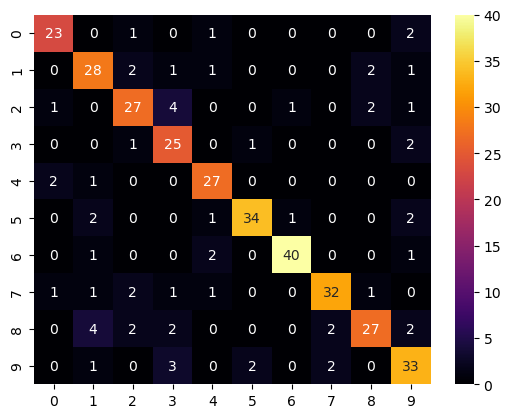

In [128]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='inferno')

In [143]:
accuracy_score(y_test,y_pred)*100

98.33333333333333

In [130]:
##for precision and recall we will need to be more specific on the class label 
y_test_2 = y_test[:]
y_test_2[y_test_2 != 6] = 0
y_test_2[y_test_2 == 6] = 1

y_pred_2 = y_pred[:]
y_pred_2[y_pred_2 != 6] = 0
y_pred_2[y_pred_2 == 6] = 1


In [131]:
y_pred_2

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [137]:
y_test_2

,0
1081,0
1707,0
927,0
713,1
262,1
...,...
506,0
557,0
1730,0
638,0


In [138]:
confusion_matrix(y_test_2,y_pred_2)

array([[314,   2],
       [  4,  40]], dtype=int64)

In [141]:
precision_score(y_test_2,y_pred_2)*100

95.23809523809523

In [142]:
recall_score(y_test_2,y_pred_2)*100

90.9090909090909

### Calculating the Error Rate on Different Sets of Data

In [31]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score,precision_score,accuracy_score
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import train_test_split

In [32]:
data = load_breast_cancer()
X = pd.DataFrame(data.data)
Y = pd.DataFrame(data.target)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.1)

In [34]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(512, 30) (512, 1) (57, 30) (57, 1)


In [35]:
## collecting the dev set
val_set = X_test.shape[0]/X_train.shape[0]
print(val_set)

0.111328125


In [36]:
X_train_new,X_dev,y_train_new,y_dev = train_test_split(X_train,y_train, test_size=val_set, random_state=101)
print(X_train_new.shape,y_train_new.shape,X_dev.shape,y_dev.shape,X_test.shape,y_test.shape)

(455, 30) (455, 1) (57, 30) (57, 1) (57, 30) (57, 1)


In [37]:
##train-dev set
indices_train = np.random.randint(0,len(X_train_new),25)
indices_dev = np.random.randint(0,len(X_dev),25)
print(indices_train,'\n',indices_dev)

[ 70 133 338 264 235 444 442 173 348 111 213 428  62 423 294 233 438 382
 354 248 251  80 349 272  37] 
 [39 41 40  8  8 22 51 45 42 38 38 45 16 52 17 22 15 18 37 48  2  2 31 50
 14]


In [2]:
X_train_dev = pd.concat([X_train_new.iloc[indices_train,:],X_dev.iloc[indices_dev,:]])
Y_train_dev = pd.concat([y_train_new.iloc[indices_train,:],y_dev.iloc[indices_dev,:]])

NameError: name 'pd' is not defined

In [39]:
print(X_train_dev.shape,Y_train_dev.shape)

(50, 30) (50, 1)


In [40]:
np.random.seed(101)
model = tree.DecisionTreeClassifier(random_state=101)
model = model.fit(X_train_new,y_train_new)

In [41]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [48]:
sets = ['Training set','Train/dev set','Validation set','Testing set']
X_sets = [X_train_new,X_train_dev,X_dev,X_test]
Y_sets = [y_train_new,Y_train_dev,y_dev,y_test]

scores = {}
for i in range(0,len(X_sets)):
    pred = model.predict(X_sets[i])
    score = round(recall_score(Y_sets[i],pred)*100,2)
    error = round((100 - score),2)
    scores[sets[i]]=[score,error]

In [49]:
scores

{'Training set': [100.0, 0.0],
 'Train/dev set': [96.97, 3.03],
 'Validation set': [93.33, 6.67],
 'Testing set': [97.14, 2.86]}

In [59]:
error_r = pd.DataFrame(scores).T
error_r.rename({0:'scores',1:'error'},axis=1, inplace=True)
error_r

,scores,error
Training set,100.00,0.00
Train/dev set,96.97,3.03
Validation set,93.33,6.67
Testing set,97.14,2.86


### Performing Error Analysis on a Model Trained to Recognize Handwritten Digits

In [53]:
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [54]:
data = datasets.load_digits()
X = pd.DataFrame(data.data)
Y = pd.DataFrame(data.target)

In [55]:
print(X.shape,Y.shape)

(1797, 64) (1797, 1)


In [56]:
###splitting data
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=101)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1617, 64) (1617, 1) (180, 64) (180, 1)


In [57]:
###kfold
k=5
splits = KFold(n_splits=k)
splits = splits.split(X_train)

In [58]:
for train_id, test_id in splits:
    x_train_new,X_dev=X_train.iloc[train_id,:],X_train.iloc[test_id,:]
    y_train_new,y_dev=y_train.iloc[train_id,:],y_train.iloc[test_id,:]
    

In [59]:
print(x_train_new.shape,y_train_new.shape,X_dev.shape,y_dev.shape,X_test.shape,y_test.shape)

(1294, 64) (1294, 1) (323, 64) (323, 1) (180, 64) (180, 1)


In [60]:
###train-dev set
train_ind = np.random.randint(0,len(x_train_new),25)
dev_ind = np.random.randint(0,len(X_dev),25)

In [61]:
X_train_dev = pd.concat([x_train_new.iloc[train_ind,:],X_dev.iloc[dev_ind,:]])
y_train_dev = pd.concat([y_train_new.iloc[train_ind,:],y_dev.iloc[dev_ind,:]])

In [62]:
print(X_train_dev.shape,y_train_dev.shape)

(50, 64) (50, 1)


In [63]:
print(x_train_new.shape,y_train_new.shape,X_train_dev.shape,y_train_dev.shape,X_dev.shape,y_dev.shape,X_test.shape,y_test.shape)

(1294, 64) (1294, 1) (50, 64) (50, 1) (323, 64) (323, 1) (180, 64) (180, 1)


In [64]:
model=tree.DecisionTreeClassifier(random_state=101)
model=model.fit(x_train_new,y_train_new)

In [65]:
##error rates
sets = ['training set','train/dev set','dev set','testing set']
X_sets = [x_train_new,X_train_dev,X_dev,X_test]
y_sets = [y_train_new,y_train_dev,y_dev,y_test]
errors = {}
for i in range(0,len(X_sets)):
    pred = model.predict(X_sets[i])
    score = round(metrics.accuracy_score(y_sets[i],pred),2)
    error = round((1-score),2)
    errors[sets[i]]=[score,error]
    

In [66]:
errors

{'training set': [1.0, 0.0],
 'train/dev set': [0.92, 0.08],
 'dev set': [0.85, 0.15],
 'testing set': [0.87, 0.13]}

In [67]:
ds = pd.DataFrame(errors).T
ds

,0,1
training set,1.00,0.00
train/dev set,0.92,0.08
dev set,0.85,0.15
testing set,0.87,0.13


In [68]:
ds.rename({0:'score',1:'error'}, axis=1,inplace=True)

In [69]:
ds

,score,error
training set,1.00,0.00
train/dev set,0.92,0.08
dev set,0.85,0.15
testing set,0.87,0.13
